<a href="https://colab.research.google.com/github/realpranav93/EIP4/blob/master/session1/1st_DNN_Pranavasai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


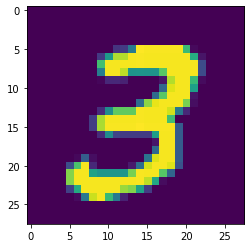

In [7]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[7])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
from keras.layers import Activation
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16,1, activation='relu'))
model.add(Convolution2D(28, 3, activation='relu'))
model.add(Convolution2D(10,10))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 16)        528       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 28)        4060      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 1, 1, 10)          28010     
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)               

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [23]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.1361 - acc: 0.9587
Epoch 2/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.0460 - acc: 0.9854
Epoch 3/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.0329 - acc: 0.9896
Epoch 4/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.0248 - acc: 0.9919
Epoch 5/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0199 - acc: 0.9932
Epoch 6/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0156 - acc: 0.9950
Epoch 7/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0124 - acc: 0.9959
Epoch 8/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.0105 - acc: 0.9967
Epoch 9/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0093 - acc: 0.9970
Epoch 10/10
60000/60000 [==============================] - 18s 302us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [25]:
print(score)

[0.04471985881958621, 0.9905]


In [0]:
y_pred = model.predict(X_test)

In [27]:
print(y_pred[:9])
print(y_test[:9])

[[3.38800101e-14 2.16220512e-17 4.36165637e-09 3.89788535e-10
  1.13377800e-18 1.22051468e-14 9.33050658e-27 1.00000000e+00
  1.29733003e-13 4.19033558e-12]
 [7.48530824e-17 4.03924854e-12 1.00000000e+00 3.15882276e-16
  2.57470620e-16 1.95491281e-22 2.81106453e-12 2.95205851e-18
  4.92150157e-13 1.87914598e-15]
 [3.46506000e-13 9.99999762e-01 1.14721217e-07 4.26559794e-11
  3.20605871e-08 5.02611073e-08 1.50425739e-09 9.66485736e-09
  3.72443125e-08 6.69665018e-11]
 [1.00000000e+00 3.64384773e-17 6.28217200e-10 1.19901064e-13
  1.93305095e-15 8.31386216e-14 1.35403411e-09 1.94493469e-14
  9.59424831e-11 4.77651751e-10]
 [4.74318439e-16 7.28758095e-15 9.40706602e-18 1.01102371e-15
  1.00000000e+00 6.90728744e-19 1.30641121e-16 6.76950675e-18
  4.45794400e-12 1.12670568e-13]
 [6.84778514e-13 9.99998927e-01 4.46349553e-08 1.30789910e-11
  6.22741325e-08 3.22621013e-10 7.47231374e-11 4.77748586e-07
  5.35477739e-07 1.10193986e-10]
 [2.58470465e-22 6.05994855e-12 1.18791600e-11 4.99871810e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

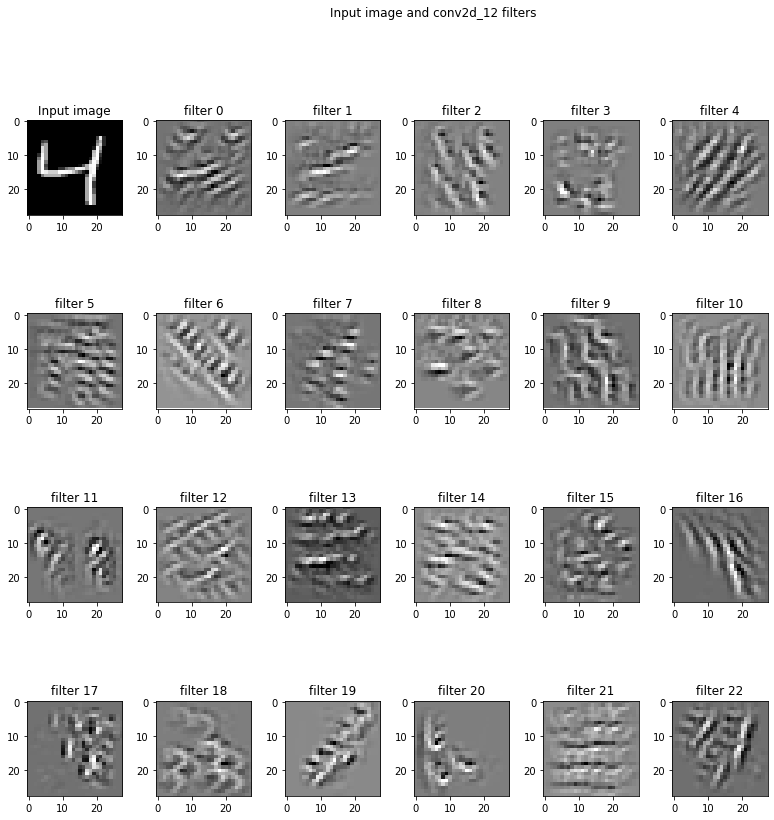

In [35]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_12'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()